In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_ratings = pd.read_csv('/Users/akshaikrishna/Downloads/ratings_Beauty.csv')
df_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [126]:
df_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [127]:
new_ratings = df_ratings.head(20000)

In [128]:
#To find most popular products 
favourite_products = pd.DataFrame(new_ratings.groupby('ProductId')['Rating'].count())
best_ratings = favourite_products.sort_values('Rating', ascending=False)
best_ratings.head(50)

,Rating
ProductId,
B0000530ED,584
B00004TUBL,558
B0000536P4,442
B00005A9WP,430
B000052YM7,412
B000050B6U,377
B000052YP6,341
B00005A43X,315
B000052YMR,313


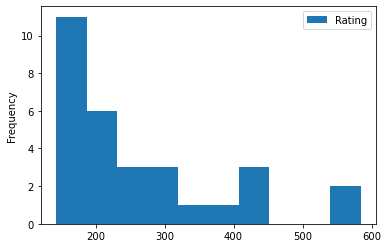

In [129]:
# Visualizing the popular products based on the ratings 
best_ratings.head(30).plot(kind = "bar")

In [130]:
#!pip install scikit-learn

In [131]:
#new_df_rating = df_ratings.drop_duplicates(['UserId', 'ProductId'])

In [132]:
#new_df_rating_pivot = new_df_rating.pivot_table(values = 'Rating', index = 'ProductId', columns = 'UserId').fillna(0)

In [133]:
#new_df_rating_matrix = csr_matrix(new_df_rating_pivot.values)

In [134]:
#import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [135]:
import pandas as pd

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.accuracy import mae
from surprise.accuracy import rmse

from surprise import SVD
from surprise import KNNBasic

In [136]:
#utility matrix(um) to find how much the user appreciates the item
no_duplicate_df = new_ratings.drop_duplicates(['UserId', 'ProductId'])
new_ratings_um = no_duplicate_df.pivot_table(values='Rating', index='ProductId', columns='UserId', fill_value=0)
new_ratings_um.head(10)

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
new_ratings.size

80000

In [138]:
new_ratings_um.size

26703198

In [139]:
new_ratings_um.shape

(1398, 19101)

In [140]:
#To find the unique items and transpose the matrix
unique_item = new_ratings_um.T
unique_item.head(25)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00005BJ8X,B00005BJ91,B00005BL1R,B00005BLRH,B00005BWXD,B00005CDRP,B00005CDRY,B00005CDS5,B00005CDS7,B00005CDS9
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03454732N8VEYJAMGTTH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
unique_item.size

26703198

In [142]:
# To check whether the matrix is transposed or not
unique_item.shape

(19101, 1398)

In [143]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [144]:
#To find the factorization of the matrix
SVD = TruncatedSVD(n_components=10)

In [145]:
#evaluating Singular Value Decomposition (SVD) of a matrix to find the factorization of that matrix
factorized_matrix = SVD.fit_transform(unique_item)
factorized_matrix.shape

(19101, 10)

In [146]:
corr_matrix = np.corrcoef(factorized_matrix)
corr_matrix.shape

(19101, 19101)

In [147]:
unique_item.index[86]

'A10GWAQMDTYJRS'

In [148]:
X = 'A10GWAQMDTYJRS'

item_names = list(unique_item.index)
item_names

['A00205921JHJK5X9LNP42',
 'A00473363TJ8YSZ3YAGG9',
 'A01437583CZ7V02UKZQ5S',
 'A020135981U0UNEAE4JV',
 'A024581134CV80ZBLIZTZ',
 'A03056581JJIOL5FSKJY7',
 'A03099101ZRK4K607JVHH',
 'A03454732N8VEYJAMGTTH',
 'A0505229A7NSH3FRXRR4',
 'A05492663T95KW63BR75K',
 'A058255625HJL78EIFBA7',
 'A059547920Q3LZVFHLPI3',
 'A06298653TJ91G7R7MD6R',
 'A065995424G4KBBX1V8BO',
 'A0678500JUN3N7KUG4PS',
 'A07410232KYRFR25CIUGJ',
 'A0800662E1835EJHCQTB',
 'A082796624UNM47DSAI6K',
 'A0864963DOAY7LXGS5I6',
 'A0870685EP51H0X8LFFU',
 'A08962033940N3X8EAXXW',
 'A100AM334XZS3V',
 'A100GYE1W4OXZ8',
 'A100I8A02TXLRU',
 'A100UD67AHFODS',
 'A1016EM9AZDV0Y',
 'A101GN97A47S1P',
 'A101WIXBOMQN07',
 'A10205RFE66H1R',
 'A102866V814SOJ',
 'A1029IITTU8289',
 'A102DX62N4DLNV',
 'A102LFZGD4MJXV',
 'A102OHYDAVD0YK',
 'A102RTTUOMWANH',
 'A102U9TVYZC0DX',
 'A102WZ11EZDIPM',
 'A102ZFBCV9QVOA',
 'A1034GEUA8ZVFR',
 'A103BJIOJSDJL1',
 'A103FNP25GNMPH',
 'A103PIRYKWQKR7',
 'A103QH6R6A4FT1',
 'A103QUZ016BQNJ',
 'A103U3KR4L2ZXT',
 'A1

In [149]:
item_ID = item_names.index(X)
item_ID

86

In [150]:
corr_item_ID = corr_matrix[item_ID]
corr_item_ID.shape

(19101,)

In [151]:
list(unique_item.index[corr_item_ID > 0.90])

['A10GWAQMDTYJRS',
 'A13OAHSQGLTSLO',
 'A148LRY4CW2B93',
 'A14APV1L3HF3TW',
 'A14NVOHUU6CVU3',
 'A15MVKFSE4Y0DP',
 'A15NF2USUI0WGS',
 'A16W17NXH26TVD',
 'A16XVV4SF4HBZM',
 'A173D8H9C18PCI',
 'A180ZB4RM80E5N',
 'A18PBX3NYCCJI9',
 'A19KPGWUK0VFRL',
 'A1A6L8RVYYVV7Z',
 'A1AOFAR7BHZWJ',
 'A1BHOF4PPTFTYN',
 'A1BV7EK9CW23Z6',
 'A1BZ6YPVH0109N',
 'A1CPU4BKDSYAWZ',
 'A1D8ND2ES00NJG',
 'A1DHKKNNW6H783',
 'A1E20A8LFD7KFW',
 'A1EIKQ8G2F7TWH',
 'A1EOCB6AZIUDO3',
 'A1GQHU5PO22ONZ',
 'A1HBEX2D49HWGD',
 'A1HC37MA582B3S',
 'A1HDTRYICAMR8P',
 'A1HHC1QYMRURKJ',
 'A1I4CP00MIIJJJ',
 'A1IHXEZMUCNOGQ',
 'A1J46T03BPIIVW',
 'A1JAP2M2ETFTDW',
 'A1JJGNE4LAJQBU',
 'A1JNCX46PMQLTX',
 'A1JYSNY492H7CE',
 'A1K5RWD7XDKKA8',
 'A1KMKEEU4RJ4BN',
 'A1KY43SXRTBVVM',
 'A1L0GP3TFKYV0',
 'A1MMVPXI5B8AGQ',
 'A1N5MQ94BMBTP2',
 'A1NVACYX4NV24J',
 'A1O17U6T8JK0HA',
 'A1OJP9GO7J0R8X',
 'A1OKKJBQ0DPFTB',
 'A1PFUTPW3KHZ7K',
 'A1PLZKQEC205P4',
 'A1Q8ESA479J5WK',
 'A1QJCZXYH1OQPX',
 'A1R36UI69TDM9T',
 'A1RGGKZ5K2683S',
 'A1S8PWBOOL44

In [152]:
x=df_ratings.drop(['ProductId','UserId','Timestamp'],axis=1)
#y=df_ratings['Rating']
y=x[:2023070]
y=y.ravel()
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=109)
#print(wines[:3])

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [153]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy Score:
1.0


In [154]:
#KNN 

In [155]:
from scipy.sparse import csr_matrix
new_rating_matrix = csr_matrix(new_ratings_um.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(new_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [156]:
new_ratings_um

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00005CDRP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00005CDRY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00005CDS5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
unique_item                                                    

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00005BJ8X,B00005BJ91,B00005BL1R,B00005BLRH,B00005BWXD,B00005CDRP,B00005CDRY,B00005CDS5,B00005CDS7,B00005CDS9
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
q_index = np.random.choice(new_ratings_um.shape[0])
dist, ind = model_knn.kneighbors(new_ratings_um.iloc[q_index, :].values.reshape(-19101, 19101), n_neighbors = 6)

for i in range(0, len(dist.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(new_ratings_um.index[q_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, new_ratings_um.index[ind.flatten()[i]], dist.flatten()[i]))

Recommendations for B000052YRK:

1: B000052ZEU, with distance of 1.0:
2: B000052ZEO, with distance of 1.0:
3: B000052ZEQ, with distance of 1.0:
4: B000052ZMF, with distance of 1.0:
5: B000052ZJF, with distance of 1.0:


In [164]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(new_ratings_um, q_index, test_size=0.4,random_state=109)

TypeError: Singleton array array(896) cannot be considered a valid collection.

In [160]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

/Users/akshaikrishna/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy Score:
1.0
